In [1]:
#Reduce Noise from Audio files

import os
import librosa
import noisereduce as nr
import soundfile as sf

# Define the main directory where your dataset is located
main_directory = 'C:\\Users\\amitk\\Desktop\\Audio Processing'  # Replace with the path to your main directory

# Loop through each day subdirectory
for day_folder in os.listdir(main_directory):
    day_path = os.path.join(main_directory, day_folder)
    
    # Check if it's a directory
    if os.path.isdir(day_path):
        # Loop through each time of day subdirectory within the day
        for time_folder in os.listdir(day_path):
            time_path = os.path.join(day_path, time_folder)
            
            # Check if it's a directory
            if os.path.isdir(time_path):
                # Loop through audio files in the current time of day subdirectory
                for audio_file in os.listdir(time_path):
                    audio_file_path = os.path.join(time_path, audio_file)
                    
                    # Check if it's an audio file (you can customize the file extensions)
                    if audio_file.endswith('.wav') or audio_file.endswith('.mp3'):
                        # Load the audio
                        y, sr = librosa.load(audio_file_path, sr=None)
                        
                        # Apply noise reduction
                        reduced_noise = nr.reduce_noise(y=y, sr=sr)
                        
                        # Save the denoised audio in the same directory
                        denoised_file_path = os.path.join(time_path, f'denoised_{audio_file}')
                        sf.write(denoised_file_path, reduced_noise, sr)
                        
                        print(f'Denoised and saved: {denoised_file_path}')


C:\Users\amitk\Desktop\xyz11\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day1\Afternoon\denoised_Afternoon Day1.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day1\Evening\denoised_Evening Day 1.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day1\Morning\denoised_Morning Day1.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day1\Night\denoised_Night Day1.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day2\Afternoon\denoised_Afternoon Day2.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day2\Evening\denoised_Evening Day2.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day2\Morning\denoised_Morning Day2.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day2\Night\denoised_Night Day2.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day3\Afternoon\denoised_Afternoon Day3.mp3
Denoised and saved: C:\Users\amitk\Desktop\Audio Processing\Day3\Evening\denoised_Evening Day3.mp3
Denoi

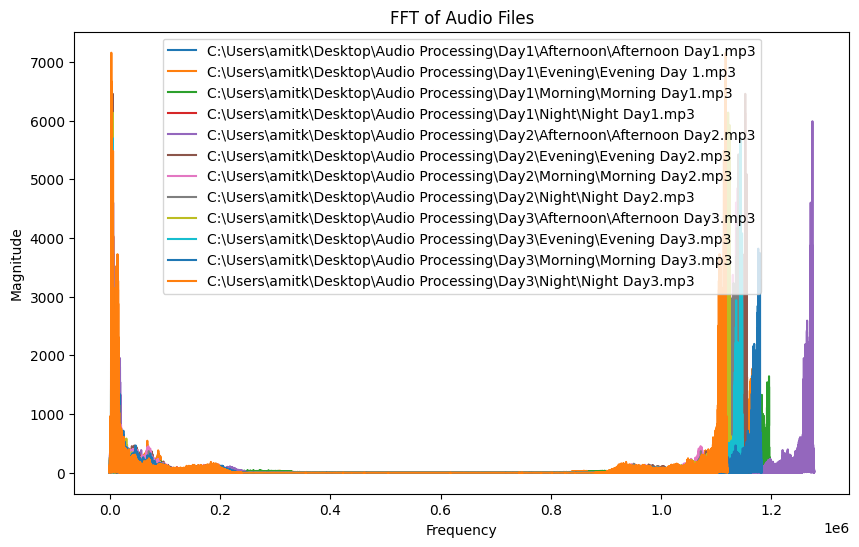

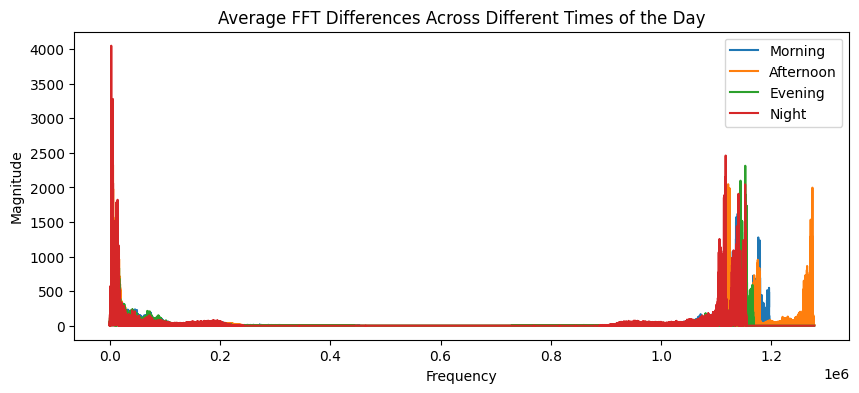

In [7]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

main_directory = 'C:\\Users\\amitk\\Desktop\\Audio Processing'  
audio_files = []

# Loop through each day subdirectory
for day_folder in os.listdir(main_directory):
    day_path = os.path.join(main_directory, day_folder)
    
    if os.path.isdir(day_path):
        # Loop through each time of day subdirectory within the day
        for time_folder in os.listdir(day_path):
            time_path = os.path.join(day_path, time_folder)
            
            if os.path.isdir(time_path):
                # Loop through audio files in the current time of day subdirectory
                for audio_file in os.listdir(time_path):
                    audio_file_path = os.path.join(time_path, audio_file)
                    
                    if audio_file.endswith('.wav') or audio_file.endswith('.mp3'):
                        audio_files.append(audio_file_path)

audio_data = []


for audio_file_path in audio_files:
    audio, sr = librosa.load(audio_file_path, sr=None)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    
    audio_features = {
        'file_path': audio_file_path,
        'sampling_rate': sr,
        'zero_crossing_rate': zero_crossing_rate,
        'spectral_centroid': spectral_centroid
    }
    audio_data.append(audio_features)


for audio_features in audio_data:
    audio = librosa.load(audio_features['file_path'], sr=audio_features['sampling_rate'])[0]
    fft_result = np.fft.fft(audio)
    audio_features['fft'] = fft_result

plt.figure(figsize=(10, 6))
for audio_features in audio_data:
    plt.plot(np.abs(audio_features['fft']), label=audio_features['file_path'])

plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT of Audio Files')
plt.legend()
plt.show()


max_fft_length = max(len(audio_features['fft']) for audio_features in audio_data)
for audio_features in audio_data:
    fft = audio_features['fft']
    padded_fft = np.pad(fft, (0, max_fft_length - len(fft)), 'constant')  # Zero-padding
    
    audio_features['padded_fft'] = padded_fft

avg_fft_by_time = {}
for time_of_day in ['Morning', 'Afternoon', 'Evening', 'Night']:
    audio_files_in_time = [audio_features for audio_features in audio_data if time_of_day in audio_features['file_path']]
    avg_fft = np.mean([audio_features['padded_fft'] for audio_features in audio_files_in_time], axis=0)
    avg_fft_by_time[time_of_day] = avg_fft

plt.figure(figsize=(10, 4s))
for time_of_day, avg_fft in avg_fft_by_time.items():
    plt.plot(np.abs(avg_fft), label=time_of_day)

plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Average FFT Differences Across Different Times of the Day')
plt.legend()
plt.show()
